In [1]:
import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
os.environ["KERAS_BACKEND"] = "torch"
import keras
from datamodules import data_processors

In [2]:
path_archivo = "../input_data/combi_500_100.csv"
path_rand1 = "../input_data/uni_52500_1.csv"
path_rand2 = "../input_data/uni_52500_2.csv"
path_rand3 = "../input_data/uni_144489.csv"
path_rand4 = "../input_data/uni_1414886.csv"
path_rand5 = "../input_data/uni_2398582.csv"
datos_combi  = pd.read_csv(path_archivo)
datos_rand1 = pd.read_csv(path_rand1)
datos_rand2 = pd.read_csv(path_rand2)
datos_rand3 = pd.read_csv(path_rand3)
datos_rand4 = pd.read_csv(path_rand4)
datos_rand5 = pd.read_csv(path_rand5)
path_to_current_model = "none" #"isotropico_act_custom.keras" # colocar "none" si quiere entrenar un modelo

In [3]:
datos_rand1.head()

,phi_K,eta,beta,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,...,eig_90,eig_91,eig_92,eig_93,eig_94,eig_95,eig_96,eig_97,eig_98,eig_99
0,0.513461,0.520834,2.462206,0.034106,1.764647,3.465653,6.446372,9.886191,11.562449,14.789919,...,1073.047116,1082.426697,1102.042351,1151.160382,1151.722711,1193.775156,1208.780911,1219.344722,1224.141007,1225.155069
1,1.453175,0.904978,0.678690,0.008021,4.361191,8.879599,15.346436,18.378833,21.309113,31.472544,...,8589.366731,8740.973305,8745.939505,8813.854849,8957.763890,9360.001209,9441.588347,9498.228970,9600.635186,9771.157762
2,0.305289,0.786018,1.750694,0.052944,1.738172,2.914895,6.154208,7.451840,9.088756,11.498754,...,476.043469,481.645629,493.045906,494.290833,498.284527,502.342678,527.075912,542.669933,547.161699,552.743847
3,0.116401,0.508804,1.561187,0.002957,3.871294,4.498427,7.313661,16.944009,23.539851,25.482868,...,3110.277601,3245.658599,3246.520316,3306.172525,3374.102154,3633.979333,3663.903530,3699.166178,3719.122191,3730.560386
4,0.235985,1.262090,2.113612,0.269728,1.356214,2.259893,4.000866,4.099376,4.148445,5.161244,...,85.275208,85.336410,86.472296,87.721344,88.834995,92.506316,94.098947,94.165783,95.719851,96.214931


In [4]:
datos_combi = datos_combi.sort_values(by=["eta", "beta", "phi_K"]).reset_index(drop=True)

In [5]:
N_eig = 10
features = ["eta", "beta"] + list(map(lambda x: "eig_" + str(x+1), range(N_eig)))
target = "phi_K"

In [6]:
datos_combi = data_processors.preprocess_data(datos_combi, N_eig, target)
datos_rand1 = data_processors.preprocess_data(datos_rand1, N_eig, target)
datos_rand2 = data_processors.preprocess_data(datos_rand2, N_eig, target)
datos_rand3 = data_processors.preprocess_data(datos_rand3, N_eig, target)
datos_rand4 = data_processors.preprocess_data(datos_rand4, N_eig, target)
datos_rand5 = data_processors.preprocess_data(datos_rand5, N_eig, target)

In [7]:
datos_rand1.head()

,phi_K,eig_0,eta,beta,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,eig_7,eig_8,eig_9,eig_10
0,0.326879,0.034106,0.520834,2.462206,0.566686,0.509182,0.537613,0.652058,0.855026,0.781779,0.720629,0.730117,0.812898,0.758283
1,0.925120,0.008021,0.904978,0.678690,0.229295,0.491147,0.578610,0.835006,0.862487,0.677070,0.827846,0.927458,0.900814,0.722837
2,0.194353,0.052944,0.786018,1.750694,0.575317,0.596307,0.473643,0.825864,0.819897,0.790412,0.655958,0.959190,0.698431,0.895983
3,0.074103,0.002957,0.508804,1.561187,0.258312,0.860588,0.615072,0.431637,0.719801,0.923752,0.973284,0.641104,0.642601,0.648560
4,0.150232,0.269728,1.262090,2.113612,0.737347,0.600123,0.564851,0.975970,0.988172,0.803769,0.893100,0.754172,0.979564,0.950200


In [8]:
metadata_temporal = {"combi": len(datos_combi), "rand1": len(datos_rand1), "rand2": len(datos_rand2)}
print(metadata_temporal)

{'combi': 52500, 'rand1': 52492, 'rand2': 52490}


In [9]:
N_phi_K = 500
N_datos = len(datos_combi)
N_partes = int(N_datos/N_phi_K)
print(N_partes)

105


In [10]:
X_combi = datos_combi[features]
X_rand1 = datos_rand1[features]
X_rand2 = datos_rand2[features]
X_rand3 = datos_rand3[features]
X_rand4 = datos_rand4[features]
X_rand5 = datos_rand5[features]
y_combi = datos_combi[target]
y_rand1 = datos_rand1[target]
y_rand2 = datos_rand2[target]
y_rand3 = datos_rand3[target]
y_rand4 = datos_rand4[target]
y_rand5 = datos_rand5[target]

In [11]:
X_train = pd.concat((X_rand2, X_rand3, X_rand4), axis = 0)
y_train = pd.concat((y_rand2, y_rand3, y_rand4), axis = 0)

In [12]:
corr_mat = X_train.select_dtypes(include=['number']).corr()
print(corr_mat)

             eta      beta     eig_1     eig_2     eig_3     eig_4     eig_5  \
eta     1.000000 -0.000882  0.513040  0.135337  0.177280  0.489946  0.250755   
beta   -0.000882  1.000000  0.423712  0.479587 -0.266015  0.173598  0.521062   
eig_1   0.513040  0.423712  1.000000 -0.115205  0.034569  0.408634  0.396328   
eig_2   0.135337  0.479587 -0.115205  1.000000 -0.583168  0.050251  0.322654   
eig_3   0.177280 -0.266015  0.034569 -0.583168  1.000000 -0.237232 -0.099520   
eig_4   0.489946  0.173598  0.408634  0.050251 -0.237232  1.000000 -0.019473   
eig_5   0.250755  0.521062  0.396328  0.322654 -0.099520 -0.019473  1.000000   
eig_6   0.394656  0.271786  0.245450  0.255177  0.068090  0.124077  0.184439   
eig_7   0.387935 -0.172710  0.021560 -0.202967  0.487273  0.011701 -0.098515   
eig_8   0.363116  0.224113  0.343987  0.173982 -0.139187  0.465792  0.113253   
eig_9   0.442407  0.260616  0.312241  0.311987 -0.122485  0.312867  0.304623   
eig_10  0.363115  0.270027  0.299746  0.

Text(0.5, 1.0, 'Correlation Matrix')

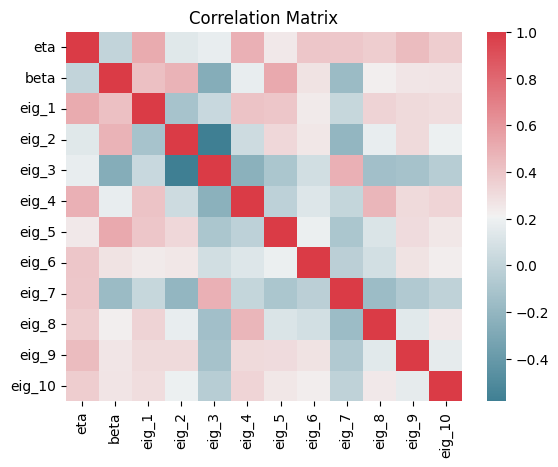

In [13]:
sns.heatmap(corr_mat, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix")

In [14]:
torch.cuda.get_device_properties(torch.device("cuda"))

_CudaDeviceProperties(name='AMD Radeon RX 6600M', major=10, minor=3, gcnArchName='gfx1030', total_memory=8176MB, multi_processor_count=14)

In [15]:
n_pow = 20
def custom_activation(x):
    return (1/n_pow) * torch.log((1 + torch.exp(n_pow * x)) / (1 + torch.exp(n_pow * (x - 1))))
#fin función

# Wrap the function in a Keras custom layer
@keras.saving.register_keras_serializable()
class CustomActivationLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CustomActivationLayer, self).__init__(**kwargs)
    
    def call(self, inputs):
        # Ensure inputs are Torch tensors
        inputs = torch.tensor(inputs) if not isinstance(inputs, torch.Tensor) else inputs
        return custom_activation(inputs)
    #fin función
#fin clase

def crear_modelo_de_regresion(lr_var, n_input_data):    
    modelo = keras.models.Sequential()
    modelo.add(keras.layers.Dense(64, activation = 'relu', input_shape = (n_input_data,)))
    modelo.add(keras.layers.Dense(32, activation = 'relu'))
    modelo.add(keras.layers.Dense(16, activation = 'relu'))
    modelo.add(keras.layers.Dense(4, activation = 'relu'))
    modelo.add(keras.layers.Dense(1))
    modelo.add(CustomActivationLayer())
    modelo.compile(optimizer = keras.optimizers.RMSprop(learning_rate = lr_var), loss = 'mse', metrics = ['mae'])
    return modelo

In [16]:
k = 4 #4 sets de validación
n_muestras_val = len(X_train) // k
epocas = 35
all_history = []

In [17]:
if path_to_current_model == "none":
    modelo = crear_modelo_de_regresion(0.001, len(features))
    history = modelo.fit(X_train, y_train, epochs = epocas, batch_size=16, 
                            validation_data = (X_rand5, y_rand5))
else:
    modelo = keras.models.load_model(path_to_current_model)
#fin if 

/home/cubos/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
9629/9629 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 0.0450 - mae: 0.1651 - val_loss: 0.0257 - val_mae: 0.1254
Epoch 2/35
9629/9629 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - loss: 0.0124 - mae: 0.0804 - val_loss: 0.0105 - val_mae: 0.0779
Epoch 3/35
9629/9629 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - loss: 0.0077 - mae: 0.0622 - val_loss: 0.0109 - val_mae: 0.0724
Epoch 4/35
9629/9629 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 0.0060 - mae: 0.0538 - val_loss: 0.0054 - val_mae: 0.0518
Epoch 5/35
9629/9629 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 0.0050 - mae: 0.0485 - val_loss: 0.0074 - val_mae: 0.0631
Epoch 6/35
9629/9629 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 0.0044 - mae: 0.0450 - val_loss: 0.0045 - val_mae: 0.0476
Epoch 7/35
9629/9629 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 0.0039 - mae: 0.0422 - val_loss: 0.0029 - val_mae: 0.0359
Epoch 8/35
9629/9629 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 0.0035 - mae: 0.0395 - val_loss: 0.0044 - val_mae: 0.0467
Epoch 9/35
9629/9629 ━━━━━━━━━━━

In [18]:
mets_train = data_processors.get_metrics(X_train, y_train, modelo)
mets_val = data_processors.get_metrics(X_rand5, y_rand5, modelo)
mets_rand1 = data_processors.get_metrics(X_rand1, y_rand1, modelo)

4815/4815 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [19]:
print("Train: ", mets_train)
print("Val: ", mets_val)
print("Test: ", mets_rand1)

Train:  {'R2': 0.988106999504078, 'RMSE': np.float64(0.03147848598889851), 'MAE': np.float64(0.0182292154636563)}
Val:  {'R2': 0.9868169684837415, 'RMSE': np.float64(0.03309739216657154), 'MAE': np.float64(0.018435988809436348)}
Test:  {'R2': 0.9864464804354015, 'RMSE': np.float64(0.03361883351894193), 'MAE': np.float64(0.018569169879192295)}


In [20]:
path_archivo_kg = "../input_data/KG_random.csv"
str_to_ndarray = lambda x: np.fromstring(x, sep=' ')
datos_kg_random = pd.read_csv(path_archivo_kg, converters={'eigvals': str_to_ndarray})
datos_kg_random = datos_kg_random[datos_kg_random["shape"] == "parallelepiped"].copy()
datos_kg_random_std = data_processors.transform_full_sized_data_isotropic(datos_kg_random, N_eig)

In [21]:
datos_kg_random_std

,K,G,dx,dy,dz,shape,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,eig_7,eig_8,eig_9,eig_10,phi_K,eta,beta
98304,1.137564,0.925310,0.345791,0.722980,0.454774,parallelepiped,0.412707,0.524816,0.664249,1.242484,1.352123,1.526493,1.622601,1.946467,2.009444,2.375666,2.419141,0.682866,1.337486,2.600392
98305,5.500412,5.321621,0.402060,0.999638,0.807374,parallelepiped,1.582053,2.487298,4.468703,4.838954,5.974758,6.092165,6.979655,7.270158,8.320324,9.165598,9.588051,0.768879,1.468138,1.848136
98306,3.375617,3.980662,0.429638,0.851665,0.529495,parallelepiped,1.910220,2.281837,2.722189,5.154925,5.985199,6.880495,7.029225,8.411706,8.449937,10.229112,10.288827,0.867462,1.350259,2.726644
98307,1.448420,4.074601,0.151318,0.942633,0.328977,parallelepiped,0.077098,0.249390,0.259526,0.483552,0.808482,1.025586,1.119151,1.497645,2.261157,2.759035,2.913411,1.229252,0.733530,1.724437
98308,0.351677,5.407791,0.446276,0.792512,0.989446,parallelepiped,0.665386,1.100423,1.220930,1.825798,2.004655,2.115424,3.059700,3.203569,3.235083,4.173500,4.760963,1.505856,1.486674,2.051426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131067,0.603325,3.002608,0.720661,0.439132,0.152189,parallelepiped,0.138335,0.260256,0.492664,0.812795,0.834834,0.876376,0.974892,1.466580,1.536137,1.864126,1.919050,1.372503,1.145569,1.334456
131068,2.302202,2.474801,0.132153,0.607512,0.605882,parallelepiped,0.140488,0.296209,0.339297,0.719497,0.721766,1.428381,1.429719,1.439594,1.715660,1.730094,1.859068,0.821514,1.591347,0.859013
131069,4.789391,3.091901,0.174914,0.402842,0.230977,parallelepiped,1.185878,1.416827,1.833425,3.694734,4.251125,4.515988,4.814955,6.960849,6.976114,8.211056,8.242119,0.573257,1.247024,2.592575
131070,0.920026,0.420177,0.185685,0.716565,0.322597,parallelepiped,0.054970,0.067623,0.107235,0.267023,0.267814,0.273033,0.344957,0.593566,0.633799,0.743236,0.745562,0.428413,0.958174,2.089119


In [22]:
datos_kg_random_copy = data_processors.preprocess_data(datos_kg_random_std, N_eig, target, opt = False)

In [23]:
datos_kg_random_copy

,phi_K,eig_0,eta,beta,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,eig_7,eig_8,eig_9,eig_10
98304,0.434726,0.412707,1.337486,2.600392,0.786383,0.790090,0.534614,0.918914,0.885771,0.940769,0.833613,0.968660,0.845844,0.982029
98305,0.489483,1.582053,1.468138,1.848136,0.636053,0.556604,0.923485,0.809900,0.980728,0.872846,0.960042,0.873783,0.907778,0.955940
98306,0.552244,1.910220,1.350259,2.726644,0.837142,0.838236,0.528075,0.861279,0.869879,0.978841,0.835648,0.995476,0.826068,0.994196
98307,0.782566,0.077098,0.733530,1.724437,0.309145,0.960942,0.536709,0.598099,0.788312,0.916397,0.747274,0.662336,0.819547,0.947012
98308,0.958658,0.665386,1.486674,2.051426,0.604664,0.901299,0.668710,0.910779,0.947638,0.691383,0.955091,0.990259,0.775149,0.876608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131067,0.873763,0.138335,1.145569,1.334456,0.531536,0.528263,0.606136,0.973601,0.952599,0.898946,0.664738,0.954720,0.824052,0.971380
131068,0.522992,0.140488,1.591347,0.859013,0.474287,0.873008,0.471576,0.996856,0.505303,0.999064,0.993141,0.839090,0.991657,0.930624
131069,0.364947,1.185878,1.247024,2.592575,0.836996,0.772776,0.496226,0.869119,0.941350,0.937909,0.691720,0.997812,0.849600,0.996231
131070,0.272736,0.054970,0.958174,2.089119,0.812896,0.630602,0.401596,0.997046,0.980887,0.791497,0.581161,0.936521,0.852755,0.996881


In [24]:
X_test3 = datos_kg_random_copy[features]
y_test3 = datos_kg_random_copy[target]

In [25]:
metrs3 = data_processors.get_metrics(X_test3, y_test3, modelo)

1024/1024 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [26]:
print("Datos KG_random Julián: ", metrs3)

Datos KG_random Julián:  {'R2': 0.78255226547947, 'RMSE': np.float64(0.10900675012151005), 'MAE': np.float64(0.050279926067193684)}


In [27]:
mets_combi = data_processors.get_metrics(X_combi, y_combi, modelo)

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [28]:
print("Mis datos combinatoriales: ", mets_combi)

Mis datos combinatoriales:  {'R2': 0.9902257602030182, 'RMSE': np.float64(0.028503328653391433), 'MAE': np.float64(0.01888896941625961)}


In [29]:
modelo.save("models/isotropico_act_custom10.keras")